In [ ]:
!mkdir -/.kaggle/

mkdir: invalid option -- '/'
Try 'mkdir --help' for more information.


In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 425M/428M [00:07<00:00, 40.6MB/s]
100% 428M/428M [00:07<00:00, 61.9MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

Import modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os#read and write functionality
import librosa #visualizing audio,playing audio
import librosa.display
from IPython.display import Audio #display audio in colab
import warnings #used to supress warning to make output cleaner
warnings.filterwarnings('ignore')
from keras import utils

In [ ]:
paths=[]
labels=[]

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):#funtion to traverse thorugh the directory.'_':placeholder for directory names
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))#constucts the file path and appends to path list
    label=filename.split('_')[-1]#splits the file name by _ and takes filename.wav
    label=label.split('.')[0]
    labels.append(label.lower())
  if len(paths)==2800:
    break
print('Dataset is loaded')

Dataset is loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_talk_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_lose_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_nag_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_cheek_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_love_neutral.wav']

In [ ]:
labels[:5]


['neutral', 'neutral', 'neutral', 'neutral', 'neutral']

In [ ]:
#create a dataframe
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()


,speech,label
0,/content/tess toronto emotional speech set dat...,neutral
1,/content/tess toronto emotional speech set dat...,neutral
2,/content/tess toronto emotional speech set dat...,neutral
3,/content/tess toronto emotional speech set dat...,neutral
4,/content/tess toronto emotional speech set dat...,neutral


In [ ]:
df['label'].value_counts()

,count
label,
neutral,400
sad,400
angry,400
fear,400
disgust,400
happy,400
ps,400


In [ ]:
#label count counts the number of each unique label and stores in series
df['label_count']=df['label'].value_counts()
df.drop('label_count', axis=1)

,speech,label
0,/content/tess toronto emotional speech set dat...,neutral
1,/content/tess toronto emotional speech set dat...,neutral
2,/content/tess toronto emotional speech set dat...,neutral
3,/content/tess toronto emotional speech set dat...,neutral
4,/content/tess toronto emotional speech set dat...,neutral
...,...,...
2795,/content/tess toronto emotional speech set dat...,neutral
2796,/content/tess toronto emotional speech set dat...,neutral
2797,/content/tess toronto emotional speech set dat...,neutral
2798,/content/tess toronto emotional speech set dat...,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

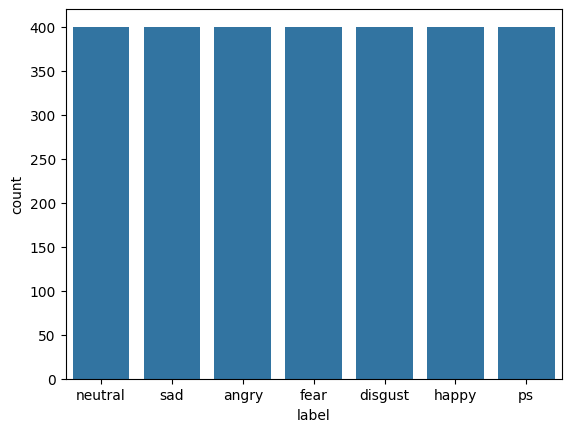

In [ ]:
sns.countplot(data=df,x='label')

In [ ]:
df

,speech,label,label_count
0,/content/tess toronto emotional speech set dat...,neutral,NaN
1,/content/tess toronto emotional speech set dat...,neutral,NaN
2,/content/tess toronto emotional speech set dat...,neutral,NaN
3,/content/tess toronto emotional speech set dat...,neutral,NaN
4,/content/tess toronto emotional speech set dat...,neutral,NaN
...,...,...,...
2795,/content/tess toronto emotional speech set dat...,neutral,NaN
2796,/content/tess toronto emotional speech set dat...,neutral,NaN
2797,/content/tess toronto emotional speech set dat...,neutral,NaN
2798,/content/tess toronto emotional speech set dat...,neutral,NaN


In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data) #short term fourier transform
    xdb = librosa.amplitude_to_db(abs(x))#coverts the amplitude to db
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [ ]:
df.drop('label_count', axis=1, inplace = True) #drop label_count column, axis=1:drop whole column,inplace=True:orginal dataset will be retained, no copy will be generated

In [ ]:
print(df.head())
print(df['label'].unique())#unique values from label column

                                              speech    label
0  /content/tess toronto emotional speech set dat...  neutral
1  /content/tess toronto emotional speech set dat...  neutral
2  /content/tess toronto emotional speech set dat...  neutral
3  /content/tess toronto emotional speech set dat...  neutral
4  /content/tess toronto emotional speech set dat...  neutral
['neutral' 'sad' 'angry' 'fear' 'disgust' 'happy' 'ps']


In [ ]:
df['speech'].unique()#unique values from speech column

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_talk_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_lose_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_nag_neutral.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_pad_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_haze_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_book_neutral.wav'],
      dtype=object)

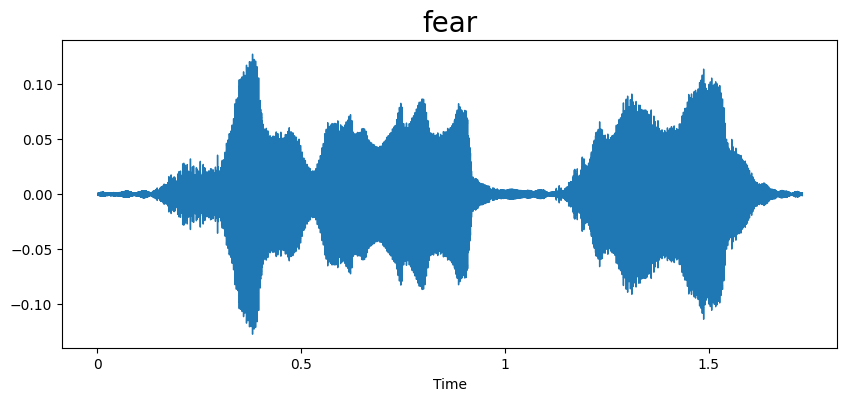

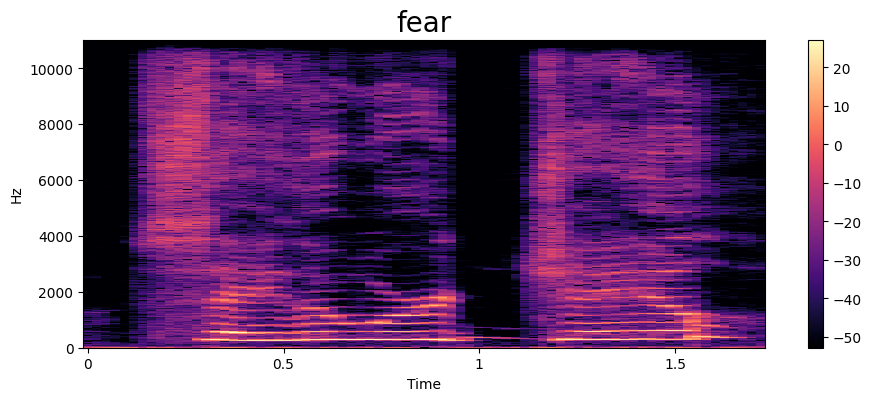

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)#custom function
spectogram(data, sampling_rate, emotion)#plots the audio data in spectogram
Audio(path)

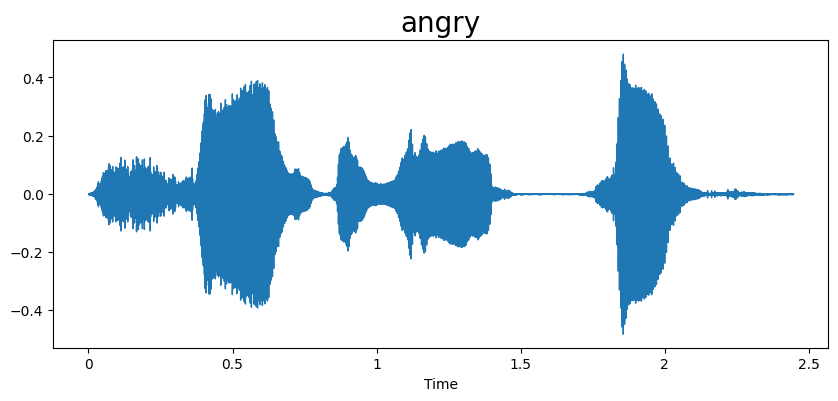

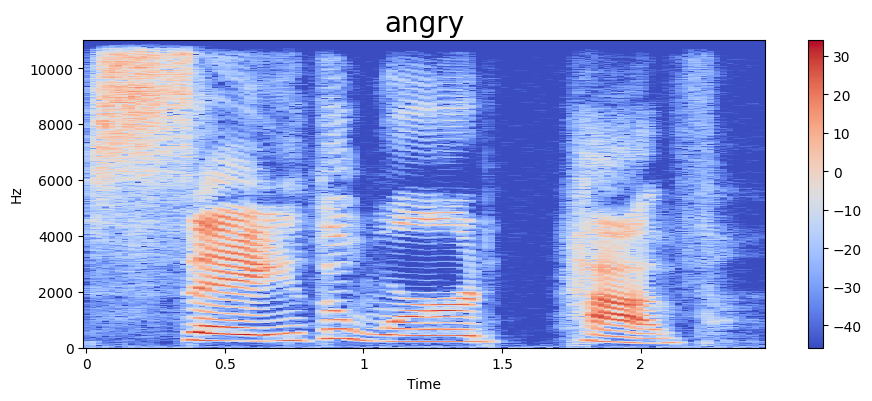

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

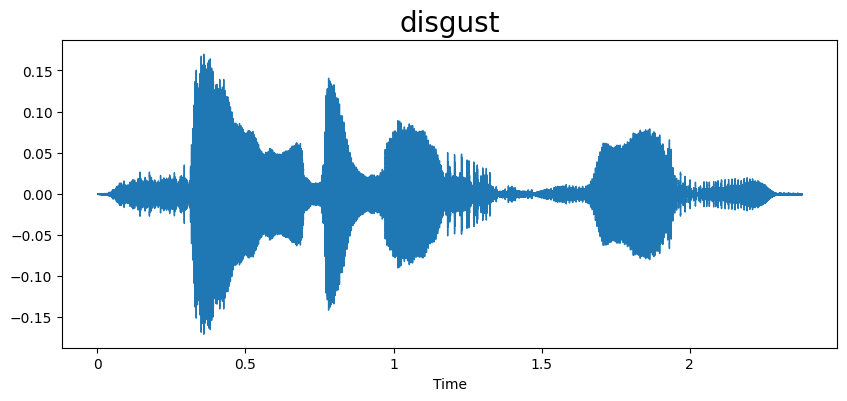

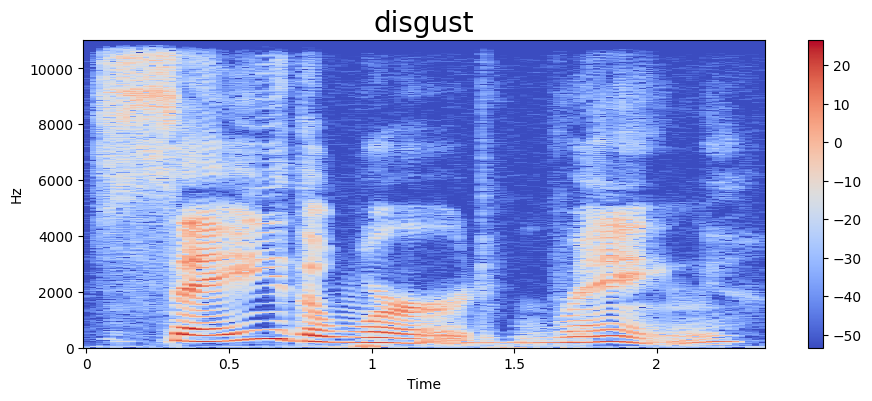

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

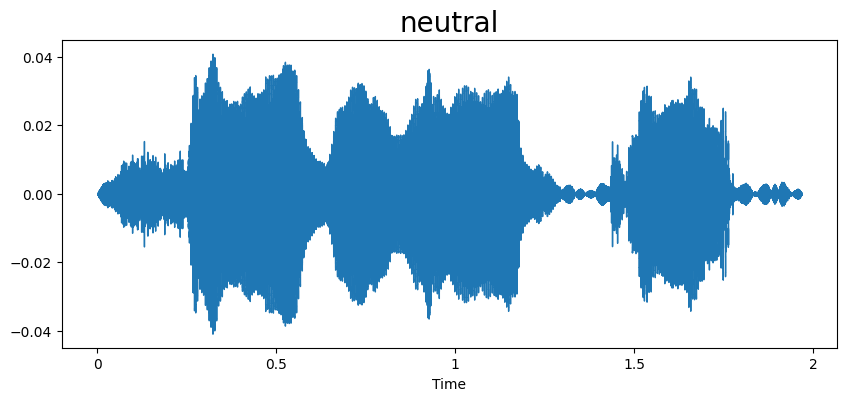

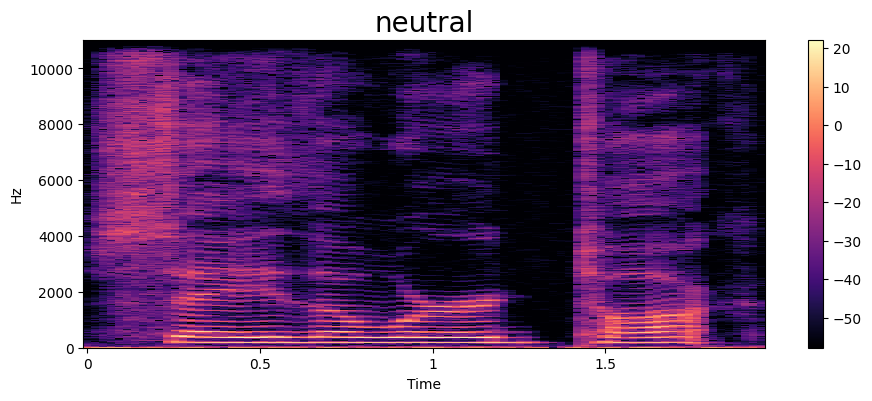

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

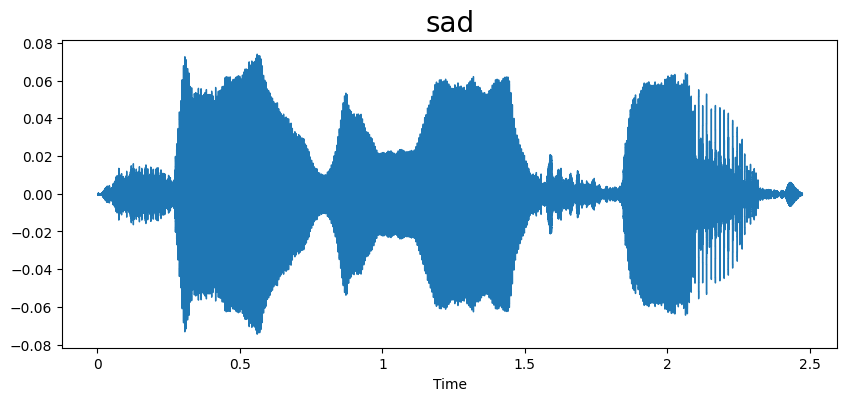

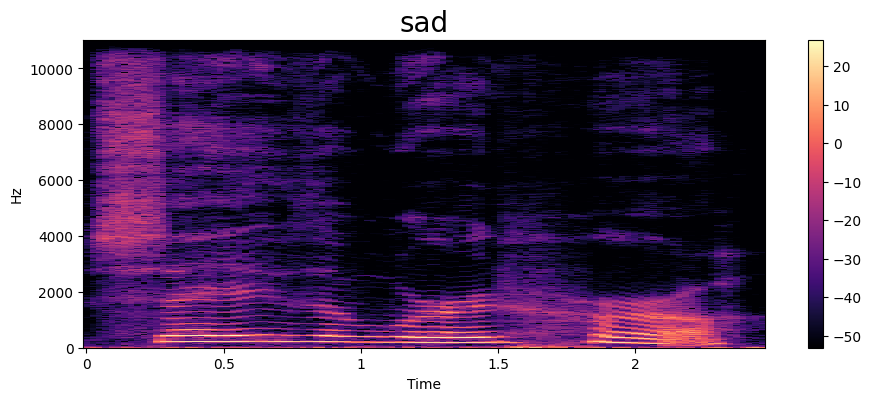

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

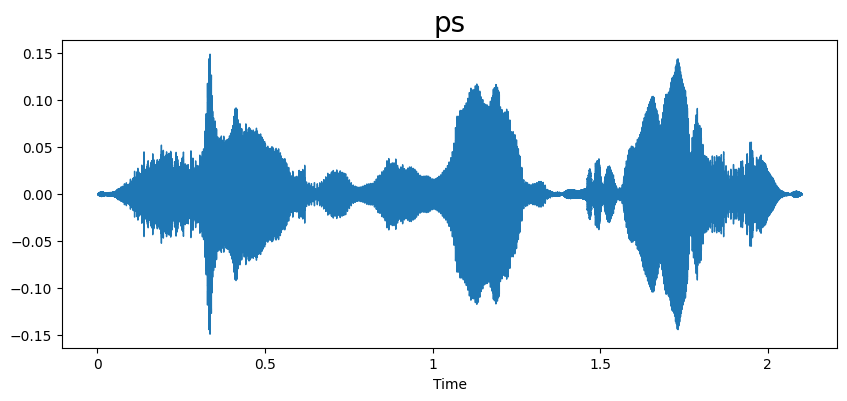

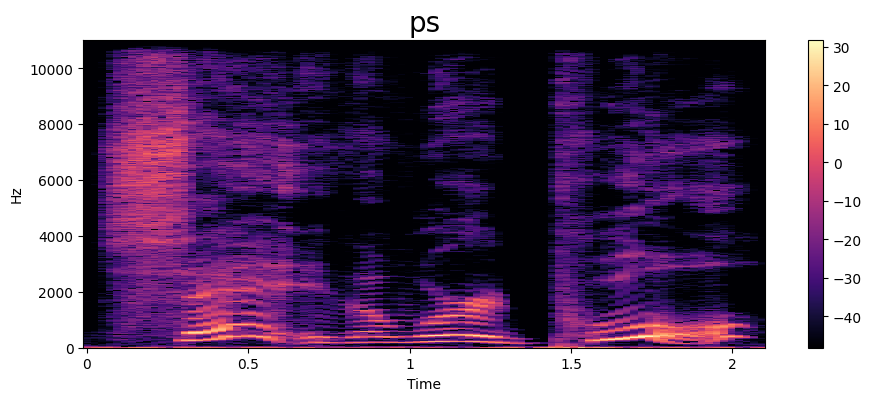

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

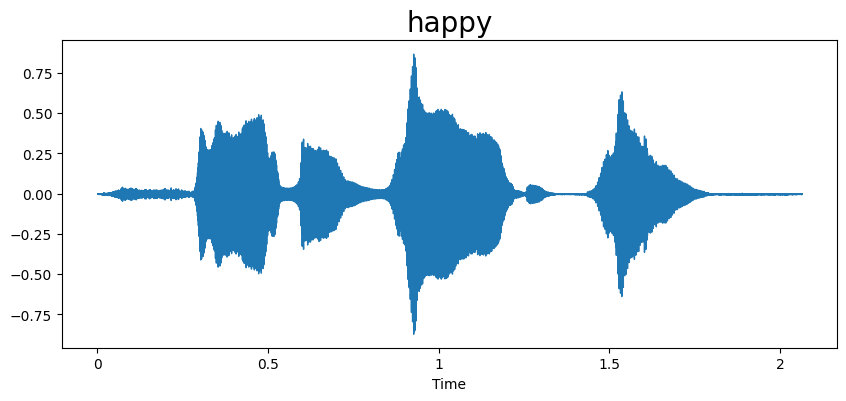

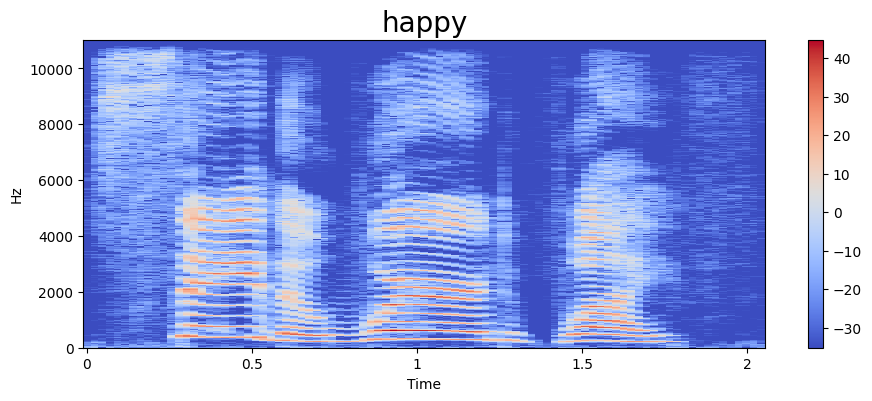

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])#returns the path of 1st audio in dataframe

array([-5.3698730e+02,  1.0252760e+02,  2.1738461e+01, -8.2061024e+00,
        4.8294067e+00,  1.3435532e+01, -1.0933850e+00, -3.9501517e+00,
       -1.4543093e+01,  2.2850523e+00, -6.4039559e+00,  3.2224357e+00,
       -3.8589182e+00,  5.5390897e+00,  8.3312902e+00,  1.6616888e+00,
       -7.3684802e+00,  5.4439325e+00, -1.5064001e-01, -2.2780733e+00,
        3.5304174e+00,  2.1940458e+00, -5.1426773e+00, -1.1432164e+00,
       -6.4314179e+00, -6.1685860e-01, -9.3720207e+00,  3.9455881e+00,
       -2.7687430e+00, -4.6967649e-01, -6.3916841e+00, -1.4559042e+00,
       -4.8137684e+00,  2.4410286e+00,  1.4301098e+01,  2.1918884e+01,
        3.2921043e+01,  3.0285397e+01,  2.1299129e+01,  1.3071409e+01],
      dtype=float32)

In [ ]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

,speech
0,"[-536.9873, 102.5276, 21.73846, -8.206102, 4.8..."
1,"[-554.0641, 92.97957, 33.090492, 9.89281, 11.1..."
2,"[-509.31543, 109.53123, 18.30364, -3.60072, 21..."
3,"[-519.658, 67.642555, 15.967107, 22.352373, 25..."
4,"[-503.85483, 95.644, 24.47885, -4.8595104, -5...."
...,...
2795,"[-376.26395, 110.23049, -1.6762025, 11.693405,..."
2796,"[-432.69568, 83.65632, -1.4237283, 25.05568, 1..."
2797,"[-368.90292, 86.4661, -18.607372, 25.889551, -..."
2798,"[-377.93915, 55.860558, 1.7749903, 38.03239, 4..."


In [ ]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2800, 40)

In [ ]:
#input split
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [ ]:
y=y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val,y_train,y_val=train_test_split(X,y,test_size=.2,random_state=42)

Create a LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model=Sequential([
    LSTM(256,return_sequences=False, input_shape=(40,1)),
    Dropout(0.5),#to prevent overflow
    Dense(128,activation='relu'),#linear unit activation function
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(7,activation='softmax')#multiclass classification
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the model
history=model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.2311 - loss: 1.8491 - val_accuracy: 0.6393 - val_loss: 1.0850
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5089 - loss: 1.1825 - val_accuracy: 0.8375 - val_loss: 0.5350
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7466 - loss: 0.6998 - val_accuracy: 0.8982 - val_loss: 0.3068
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8763 - loss: 0.4113 - val_accuracy: 0.9161 - val_loss: 0.2611
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9015 - loss: 0.3291 - val_accuracy: 0.9429 - val_loss: 0.1858
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9262 - loss: 0.2552 - val_accuracy: 0.8911 - val_loss: 0.3784
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9316 - loss: 0.2524 - val_accuracy: 0.9500 - val_loss: 0.1428
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9462 - loss: 0.1946 - val_accuracy: 0.9500 - val_l

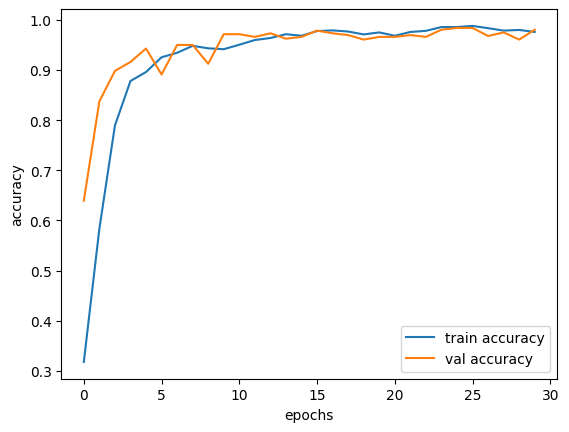

In [ ]:
epochs=list(range(30))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

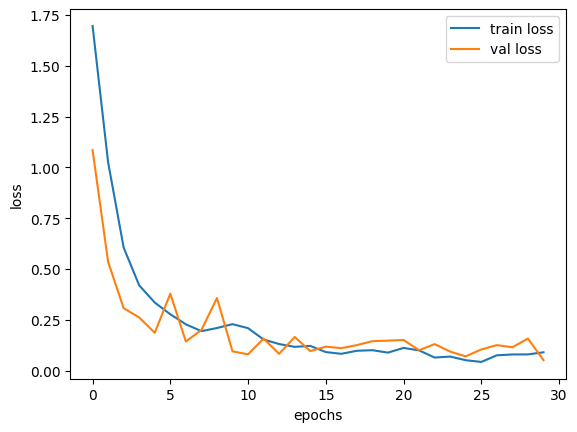

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[93  0  0  2  0  0  0]
 [ 0 67  0  0  0  0  0]
 [ 0  0 77  0  0  0  0]
 [ 0  0  0 94  0  2  0]
 [ 0  0  0  0 70  0  0]
 [ 2  1  0  3  0 71  0]
 [ 1  0  0  0  0  0 77]]


In [ ]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))#support :no. of instances(occurence of data) of each class

Classification Report:
              precision    recall  f1-score   support

       angry       0.97      0.98      0.97        95
     disgust       0.99      1.00      0.99        67
        fear       1.00      1.00      1.00        77
       happy       0.95      0.98      0.96        96
     neutral       1.00      1.00      1.00        70
          ps       0.97      0.92      0.95        77
         sad       1.00      0.99      0.99        78

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



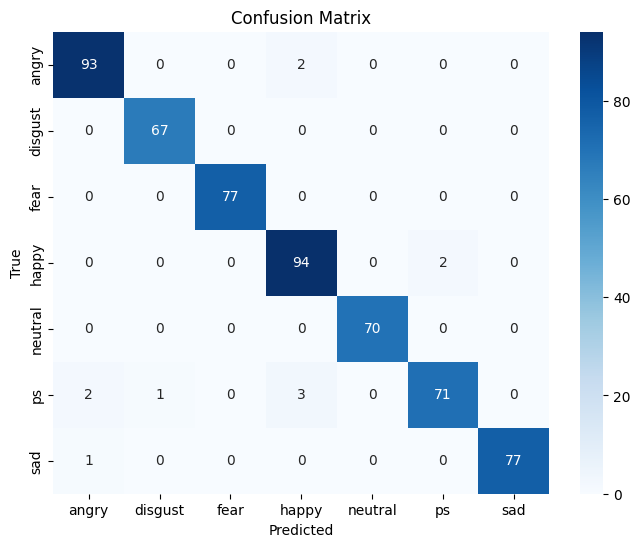

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()